In [1]:
import pandas as pd 

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [6]:
dataset = dataset.astype(int)

In [7]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [8]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [9]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [10]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [11]:
dependent=dataset[['charges']]

In [12]:
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [131]:
#model creation
from sklearn.tree import DecisionTreeRegressor
#regressor=DecisionTreeRegressor() #default (criterion='squared_error',splitter='best')
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='best')
#regressor=DecisionTreeRegressor(criterion='squared_error', max_features='sqrt', splitter='best') 
#regressor=DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='random')
#regressor=DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='best')
#regressor=DecisionTreeRegressor(criterion='friedman_mse', max_features='log2',splitter='random')
#regressor=DecisionTreeRegressor(criterion='absolute_error',max_features='sqrt', splitter='best')
#regressor=DecisionTreeRegressor(criterion='absolute_error',max_features='log2', splitter='random')
#regressor=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='best')
regressor=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='random')
regressor=regressor.fit(x_train,y_train)

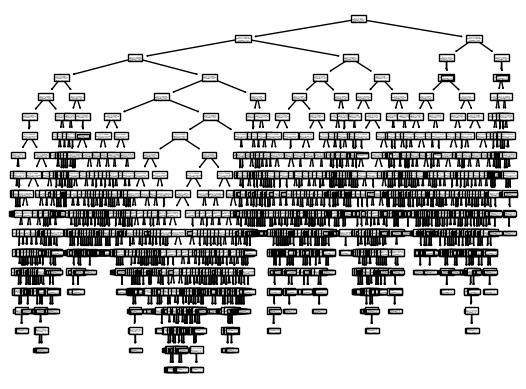

In [132]:
import matplotlib.pyplot as plt
from sklearn import tree 
tree.plot_tree(regressor)
plt.show()

In [133]:
y_pred=regressor.predict(x_test)

In [134]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [135]:
r_score

0.6606594146999321